# Preparation

In [1]:
# Importing required libraries
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import numpy
from time import perf_counter

## Get unbalaned dataset

In [2]:
# Get data that was already generated randomly (but is unbalanced)
#data_directory = "D:/Data/ELVTN_Datasets/5_Guided_randstep_restarting/"

t_data_transfer = 0
t_SMOTE = 0
t_tot = 0
t_ini = perf_counter()


# Get injections
injections = numpy.loadtxt(open(train_dir + dataset_id + "/input_injections_kW.csv", "rb"), delimiter=",", skiprows=0)

# Get classification
classification = numpy.loadtxt(open(train_dir + dataset_id + "/output_classification_notsafe.csv", "rb"), delimiter=",", skiprows=0)
print("The number of insecure samples before SMOTE:", numpy.sum(classification), "out of", len(classification), "total samples")

t_data_transfer = perf_counter() - t_ini

The number of insecure samples: 899906.0 out of 1000000 total samples


## Resample using SMOTE

In [3]:
sm = SMOTE(random_state=92)
injections_SMOTE, classification_SMOTE = sm.fit_resample(injections, classification)
print("The number of insecure samples after SMOTE:", numpy.sum(classification_SMOTE), "out of", len(classification_SMOTE), "total samples")

t_SMOTE = perf_counter() - t_ini - t_data_transfer 

C:\Users\jcuenca\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jcuenca\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


The number of insecure samples: 899906.0 out of 1799812 total samples


## Save the stored data

In [4]:
# Store input and classification output
numpy.savetxt(train_dir + dataset_id + "_wSMOTE/input_injections_kW.csv", injections_SMOTE, delimiter=",")
numpy.savetxt(train_dir + dataset_id + "_wSMOTE/output_classification_notsafe.csv", classification_SMOTE, delimiter=",")

t_tot = perf_counter() - t_ini 
t_data_transfer = t_tot - t_SMOTE

### Analysis of computational time

In [ ]:
print("------- SMOTE analysis -------")
print("To balance the dataset of", n_op, "operational points...")
print("Total execution time:", t_tot, "seconds")
print("Total data exchange time:", t_data_transfer, "seconds")
print("Total SMOTE time:", t_SMOTE, "seconds")
INFO_SIM = [n_op, unsafe, t_tot, t_data, t_pf, t_verif]

## Analysis of the Operational Points Generated

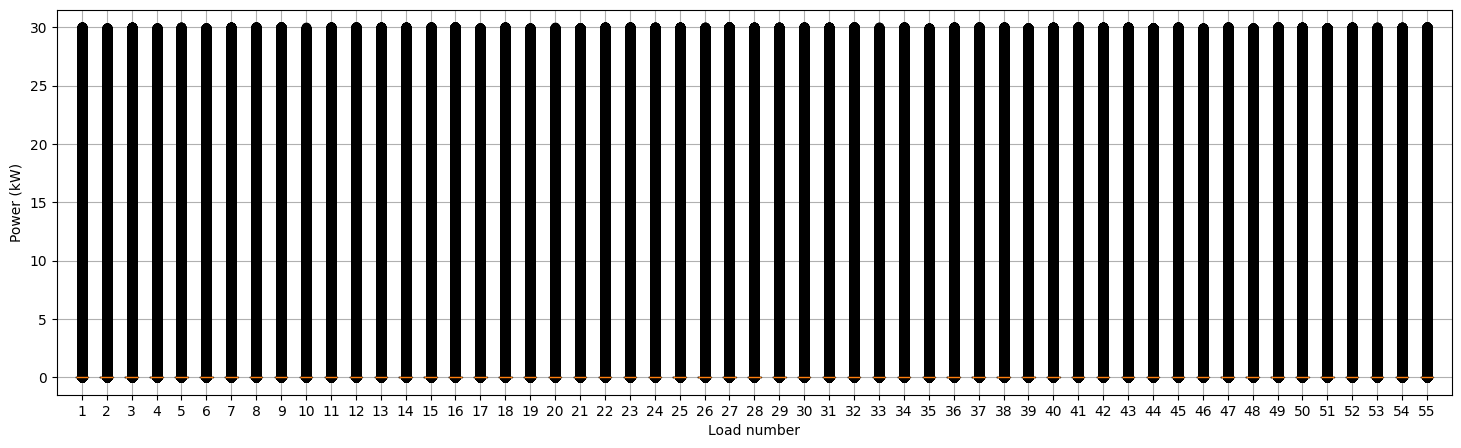

899906.0 safe operational points generated
899906.0 unsafe operational points generated
Of the  1799812  operational points generated,  0.0 % are repeated


In [5]:
# Count repeated points
unq, count = numpy.unique(injections_SMOTE, axis=0, return_counts=True)
print("Of the ", len(classification_SMOTE), " operational points generated, ", len(unq[count>1])/len(classification_SMOTE)*100, "% are repeated")